In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Real demand data for 2 years

In [ ]:
demand_data = [17.58, 24.11, 20.02, 19.11, 22.56, 24.14, 22.72, 21.31, 23.02, 24.96, 22.07, 21.25,
               21.02, 23.89, 21.92, 21.09, 22.58, 25.92, 22.73, 21.83, 22.75, 24.26, 23.18, 22.12]

Time index

In [ ]:
time_index = pd.date_range(start='2022-01-01', periods=len(demand_data), freq='M')

Pandas datafram with demand data and time index

In [ ]:
df = pd.DataFrame({'demand': demand_data}, index=time_index)

Function to perform holtwinter demand forcasting with given parameters

In [ ]:
def holt_winters_forecast(alpha, beta, gamma):
    model = ExponentialSmoothing(df['demand'], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    forecast = result.forecast(steps=24)
    return forecast

Function to calculate MSE

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_mse(actual, forecast):
    return mean_squared_error(actual, forecast)

Prameter combination for sensitivity analysis

In [ ]:
alpha_values = np.linspace(0.1, 1, num=10)  # Generates 10 values between 0 and 1
beta_values = np.linspace(0.1, 1, num=10)   # Generates 10 values between 0 and 1
gamma_values = np.linspace(0.1, 1, num=10)  # Generates 10 values between 0 and 1

In [ ]:
best_mse = float('inf')
best_params = None

for alpha, beta, gamma in itertools.product(alpha_values, beta_values, gamma_values):
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'Alpha={alpha}, Beta={beta}, Gamma={gamma}')
    print('MSE:', mse)

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.1, Gamma=0.1
MSE: 2.922575485674876
Alpha=0.1, Beta=0.1, Gamma=0.2
MSE: 2.8311025575069144
Alpha=0.1, Beta=0.1, Gamma=0.30000000000000004
MSE: 2.7335029878396404
Alpha=0.1, Beta=0.1, Gamma=0.4
MSE: 2.635282615981711
Alpha=0.1, Beta=0.1, Gamma=0.5
MSE: 2.5447625085902015
Alpha=0.1, Beta=0.1, Gamma=0.6
MSE: 2.472877059321293
Alpha=0.1, Beta=0.1, Gamma=0.7000000000000001
MSE: 2.4332558013580092
Alpha=0.1, Beta=0.1, Gamma=0.8
MSE: 2.4372975708409195
Alpha=0.1, Beta=0.1, Gamma=0.9
MSE: 2.492350026223767
Alpha=0.1, Beta=0.1, Gamma=1.0
MSE: 2.597349191928353
Alpha=0.1, Beta=0.2, Gamma=0.1
MSE: 1.8018561132715456
Alpha=0.1, Beta=0.2, Gamma=0.2
MSE: 1.659777780836098
Alpha=0.1, Beta=0.2, Gamma=0.30000000000000004
MSE: 1.5298036228581893
Alpha=0.1, Beta=0.2, Gamma=0.4
MSE: 1.420665848544773
Alpha=0.1, Beta=0.2, Gamma=0.5
MSE: 1.3418492765254193
Alpha=0.1, Beta=0.2, Gamma=0.6
MSE: 1.302305244907523
Alpha=0.1, Beta=0.2, Gamma=0.7000000000000001
MSE: 1.310284141421901
Alpha=0.1, B

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.4, Gamma=0.1
MSE: 0.9503614389689833
Alpha=0.1, Beta=0.4, Gamma=0.2
MSE: 0.9709532398627783
Alpha=0.1, Beta=0.4, Gamma=0.30000000000000004
MSE: 0.9808643826878501
Alpha=0.1, Beta=0.4, Gamma=0.4
MSE: 0.9761970663845189
Alpha=0.1, Beta=0.4, Gamma=0.5
MSE: 0.9591987138641546
Alpha=0.1, Beta=0.4, Gamma=0.6
MSE: 0.9400223067577077
Alpha=0.1, Beta=0.4, Gamma=0.7000000000000001
MSE: 0.934433453687002
Alpha=0.1, Beta=0.4, Gamma=0.8
MSE: 0.959464918654644
Alpha=0.1, Beta=0.4, Gamma=0.9
MSE: 1.0273334007167143
Alpha=0.1, Beta=0.4, Gamma=1.0
MSE: 1.14093972073022
Alpha=0.1, Beta=0.5, Gamma=0.1
MSE: 1.186545836007431
Alpha=0.1, Beta=0.5, Gamma=0.2
MSE: 1.1710543349755833
Alpha=0.1, Beta=0.5, Gamma=0.30000000000000004
MSE: 1.1283077867192841


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.5, Gamma=0.4
MSE: 1.0644528494446892
Alpha=0.1, Beta=0.5, Gamma=0.5
MSE: 0.9927420590697258
Alpha=0.1, Beta=0.5, Gamma=0.6
MSE: 0.9315938593698249
Alpha=0.1, Beta=0.5, Gamma=0.7000000000000001
MSE: 0.9008581042244067
Alpha=0.1, Beta=0.5, Gamma=0.8
MSE: 0.9166000648525131
Alpha=0.1, Beta=0.5, Gamma=0.9
MSE: 0.986136837519788
Alpha=0.1, Beta=0.5, Gamma=1.0
MSE: 1.105766008917161
Alpha=0.1, Beta=0.6, Gamma=0.1
MSE: 1.2106403302613542
Alpha=0.1, Beta=0.6, Gamma=0.2
MSE: 1.1298572422985262
Alpha=0.1, Beta=0.6, Gamma=0.30000000000000004
MSE: 1.031870934034232
Alpha=0.1, Beta=0.6, Gamma=0.4
MSE: 0.9311280177752854
Alpha=0.1, Beta=0.6, Gamma=0.5
MSE: 0.8459560528189122
Alpha=0.1, Beta=0.6, Gamma=0.6
MSE: 0.7953828154889573
Alpha=0.1, Beta=0.6, Gamma=0.7000000000000001
MSE: 0.795048685861976


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.6, Gamma=0.8
MSE: 0.8523191618040568
Alpha=0.1, Beta=0.6, Gamma=0.9
MSE: 0.9650274156804644
Alpha=0.1, Beta=0.6, Gamma=1.0
MSE: 1.1214994499795894
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.1
MSE: 1.031461913148714
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.2
MSE: 0.9193770716127444
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 0.8142184237838047
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.4
MSE: 0.7331676435314943
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.5
MSE: 0.6936265427718159
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.6
MSE: 0.7080598376950226
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 0.7811760163964719
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.8
MSE: 0.9090643515313018
Alpha=0.1, Beta=0.7000000000000001, Gamma=0.9
MSE: 1.0797597371891487
Alpha=0.1, Beta=0.7000000000000001, Gamma=1.0
MSE: 1.2764699176389034
Alpha=0.1, Beta=0.8, Gamma=0.1
MSE: 0.796182237568576


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.8, Gamma=0.2
MSE: 0.706773193674945
Alpha=0.1, Beta=0.8, Gamma=0.30000000000000004
MSE: 0.6523349492420567
Alpha=0.1, Beta=0.8, Gamma=0.4
MSE: 0.6480430008702375
Alpha=0.1, Beta=0.8, Gamma=0.5
MSE: 0.7033008470047909
Alpha=0.1, Beta=0.8, Gamma=0.6
MSE: 0.818690714135973
Alpha=0.1, Beta=0.8, Gamma=0.7000000000000001
MSE: 0.9856803862441216
Alpha=0.1, Beta=0.8, Gamma=0.8
MSE: 1.1887772247874815
Alpha=0.1, Beta=0.8, Gamma=0.9
MSE: 1.409674529176672
Alpha=0.1, Beta=0.8, Gamma=1.0
MSE: 1.6306002371088997
Alpha=0.1, Beta=0.9, Gamma=0.1
MSE: 0.6413442331272227
Alpha=0.1, Beta=0.9, Gamma=0.2
MSE: 0.6282111045053095
Alpha=0.1, Beta=0.9, Gamma=0.30000000000000004
MSE: 0.6751853081574515
Alpha=0.1, Beta=0.9, Gamma=0.4
MSE: 0.7894714678136023
Alpha=0.1, Beta=0.9, Gamma=0.5
MSE: 0.9680465259290937


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.9, Gamma=0.6
MSE: 1.1972790524092807
Alpha=0.1, Beta=0.9, Gamma=0.7000000000000001
MSE: 1.456145020589063
Alpha=0.1, Beta=0.9, Gamma=0.8
MSE: 1.7218351133265493
Alpha=0.1, Beta=0.9, Gamma=0.9
MSE: 1.9737165008069493
Alpha=0.1, Beta=0.9, Gamma=1.0
MSE: 2.1963920605603664
Alpha=0.1, Beta=1.0, Gamma=0.1
MSE: 0.6590669404622277
Alpha=0.1, Beta=1.0, Gamma=0.2
MSE: 0.7642206381070578
Alpha=0.1, Beta=1.0, Gamma=0.30000000000000004
MSE: 0.9455893006973071
Alpha=0.1, Beta=1.0, Gamma=0.4
MSE: 1.1984277195894262
Alpha=0.1, Beta=1.0, Gamma=0.5
MSE: 1.5057107933345175
Alpha=0.1, Beta=1.0, Gamma=0.6
MSE: 1.8411287354051105
Alpha=0.1, Beta=1.0, Gamma=0.7000000000000001
MSE: 2.1759034284144416
Alpha=0.1, Beta=1.0, Gamma=0.8
MSE: 2.4836864120148254
Alpha=0.1, Beta=1.0, Gamma=0.9
MSE: 2.7458015378203693


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=1.0, Gamma=1.0
MSE: 2.949659234503631
Alpha=0.2, Beta=0.1, Gamma=0.1
MSE: 2.1808782739918007
Alpha=0.2, Beta=0.1, Gamma=0.2
MSE: 2.100184134318273
Alpha=0.2, Beta=0.1, Gamma=0.30000000000000004
MSE: 2.0316769609647873
Alpha=0.2, Beta=0.1, Gamma=0.4
MSE: 1.9801294941217897
Alpha=0.2, Beta=0.1, Gamma=0.5
MSE: 1.951100570548703
Alpha=0.2, Beta=0.1, Gamma=0.6
MSE: 1.9506554884063412
Alpha=0.2, Beta=0.1, Gamma=0.7000000000000001
MSE: 1.984652061327133
Alpha=0.2, Beta=0.1, Gamma=0.8
MSE: 2.0574092115046074
Alpha=0.2, Beta=0.1, Gamma=0.9
MSE: 2.1669947428182392
Alpha=0.2, Beta=0.1, Gamma=1.0
MSE: 2.305975892863358
Alpha=0.2, Beta=0.2, Gamma=0.1
MSE: 0.8895152795113713
Alpha=0.2, Beta=0.2, Gamma=0.2
MSE: 0.8721624714234384
Alpha=0.2, Beta=0.2, Gamma=0.30000000000000004
MSE: 0.8686101642763369
Alpha=0.2, Beta=0.2, Gamma=0.4
MSE: 0.8823946603520595


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.2, Gamma=0.5
MSE: 0.9186999926476019
Alpha=0.2, Beta=0.2, Gamma=0.6
MSE: 0.9838452884059472
Alpha=0.2, Beta=0.2, Gamma=0.7000000000000001
MSE: 1.0833156510766353
Alpha=0.2, Beta=0.2, Gamma=0.8
MSE: 1.219296609071807
Alpha=0.2, Beta=0.2, Gamma=0.9
MSE: 1.3884887925846818
Alpha=0.2, Beta=0.2, Gamma=1.0
MSE: 1.5801006044124761
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.1
MSE: 0.7357034128680792
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.2
MSE: 0.7265528619903944
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 0.7360229575699057
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.4
MSE: 0.7728988935249795
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.5
MSE: 0.8445470158021663
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.6
MSE: 0.9552470469345659
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 1.1042879183722871
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.8
MSE: 1.2855413476650097
Alpha=0.2, Beta=0.30000000000000004, Gamma=0.9
MSE: 1.487

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.30000000000000004, Gamma=1.0
MSE: 1.6957296270089632
Alpha=0.2, Beta=0.4, Gamma=0.1
MSE: 0.7167187782804718
Alpha=0.2, Beta=0.4, Gamma=0.2
MSE: 0.7751081532195406
Alpha=0.2, Beta=0.4, Gamma=0.30000000000000004
MSE: 0.8830598049290495
Alpha=0.2, Beta=0.4, Gamma=0.4
MSE: 1.043137880246558
Alpha=0.2, Beta=0.4, Gamma=0.5
MSE: 1.2503564455031593
Alpha=0.2, Beta=0.4, Gamma=0.6
MSE: 1.4922522550950674
Alpha=0.2, Beta=0.4, Gamma=0.7000000000000001
MSE: 1.7513959252697664
Alpha=0.2, Beta=0.4, Gamma=0.8
MSE: 2.008570876854527
Alpha=0.2, Beta=0.4, Gamma=0.9
MSE: 2.246444066830907
Alpha=0.2, Beta=0.4, Gamma=1.0
MSE: 2.4506278788603826
Alpha=0.2, Beta=0.5, Gamma=0.1
MSE: 1.0627038896713934
Alpha=0.2, Beta=0.5, Gamma=0.2
MSE: 1.3177216638037303
Alpha=0.2, Beta=0.5, Gamma=0.30000000000000004
MSE: 1.6394750233381032


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.5, Gamma=0.4
MSE: 2.01386606524734
Alpha=0.2, Beta=0.5, Gamma=0.5
MSE: 2.414294774523296
Alpha=0.2, Beta=0.5, Gamma=0.6
MSE: 2.811276632891903
Alpha=0.2, Beta=0.5, Gamma=0.7000000000000001
MSE: 3.1740779210785135
Alpha=0.2, Beta=0.5, Gamma=0.8
MSE: 3.4791051876047976
Alpha=0.2, Beta=0.5, Gamma=0.9
MSE: 3.709195789179413
Alpha=0.2, Beta=0.5, Gamma=1.0
MSE: 3.857050948919371
Alpha=0.2, Beta=0.6, Gamma=0.1
MSE: 2.0672816720590794
Alpha=0.2, Beta=0.6, Gamma=0.2
MSE: 2.569655348506853
Alpha=0.2, Beta=0.6, Gamma=0.30000000000000004
MSE: 3.125771882345066
Alpha=0.2, Beta=0.6, Gamma=0.4
MSE: 3.7046273225056408
Alpha=0.2, Beta=0.6, Gamma=0.5
MSE: 4.269561670429777
Alpha=0.2, Beta=0.6, Gamma=0.6
MSE: 4.782084991508914


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.6, Gamma=0.7000000000000001
MSE: 5.20735386524798
Alpha=0.2, Beta=0.6, Gamma=0.8
MSE: 5.518537443005656
Alpha=0.2, Beta=0.6, Gamma=0.9
MSE: 5.701047174799974
Alpha=0.2, Beta=0.6, Gamma=1.0
MSE: 5.755413389411472
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.1
MSE: 3.649226648418336
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.2
MSE: 4.364767100472197
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 5.108148358167246
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.4
MSE: 5.84426399742867
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.5
MSE: 6.532750778882279
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.6
MSE: 7.12952051514294
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 7.592762357559195
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.8
MSE: 7.890014434383758
Alpha=0.2, Beta=0.7000000000000001, Gamma=0.9
MSE: 8.006885451869351
Alpha=0.2, Beta=0.7000000000000001, Gamma=1.0
MSE: 7.949839449305853


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.8, Gamma=0.1
MSE: 5.566271249043607
Alpha=0.2, Beta=0.8, Gamma=0.2
MSE: 6.44892616032513
Alpha=0.2, Beta=0.8, Gamma=0.30000000000000004
MSE: 7.347255583214249
Alpha=0.2, Beta=0.8, Gamma=0.4
MSE: 8.225579281067239
Alpha=0.2, Beta=0.8, Gamma=0.5
MSE: 9.036490773708268
Alpha=0.2, Beta=0.8, Gamma=0.6
MSE: 9.717191376632451
Alpha=0.2, Beta=0.8, Gamma=0.7000000000000001
MSE: 10.211835247599163
Alpha=0.2, Beta=0.8, Gamma=0.8
MSE: 10.480156009790178
Alpha=0.2, Beta=0.8, Gamma=0.9
MSE: 10.511104136874751
Alpha=0.2, Beta=0.8, Gamma=1.0
MSE: 10.323938178704656
Alpha=0.2, Beta=0.9, Gamma=0.1
MSE: 7.656714886666848
Alpha=0.2, Beta=0.9, Gamma=0.2
MSE: 8.70396740444329
Alpha=0.2, Beta=0.9, Gamma=0.30000000000000004
MSE: 9.783501477551917
Alpha=0.2, Beta=0.9, Gamma=0.4
MSE: 10.84061732385649


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.2, Beta=0.9, Gamma=0.5
MSE: 11.803338976812512
Alpha=0.2, Beta=0.9, Gamma=0.6
MSE: 12.580768593203743
Alpha=0.2, Beta=0.9, Gamma=0.7000000000000001
MSE: 13.092061138735637
Alpha=0.2, Beta=0.9, Gamma=0.8
MSE: 13.294934100122845
Alpha=0.2, Beta=0.9, Gamma=0.9
MSE: 13.195870053289568
Alpha=0.2, Beta=0.9, Gamma=1.0
MSE: 12.838936541276246
Alpha=0.2, Beta=1.0, Gamma=0.1
MSE: 9.910256555359492
Alpha=0.2, Beta=1.0, Gamma=0.2
MSE: 11.19162020941281
Alpha=0.2, Beta=1.0, Gamma=0.30000000000000004
MSE: 12.524473470308742
Alpha=0.2, Beta=1.0, Gamma=0.4
MSE: 13.830355723619094
Alpha=0.2, Beta=1.0, Gamma=0.5
MSE: 14.984155018828462
Alpha=0.2, Beta=1.0, Gamma=0.6
MSE: 15.849112713814947
Alpha=0.2, Beta=1.0, Gamma=0.7000000000000001
MSE: 16.32599165436751
Alpha=0.2, Beta=1.0, Gamma=0.8
MSE: 16.38923464031951
Alpha=0.2, Beta=1.0, Gamma=0.9
MSE: 16.083800512028237
Alpha=0.2, Beta=1.0, Gamma=1.0
MSE: 15.491579871906486
Alpha=0.30000000000000004, Beta=0.1, Gamma=0.1
MSE: 2.315827917284017
Alpha=0.

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.2, Gamma=0.2
MSE: 1.3843946262798295
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.30000000000000004
MSE: 1.536607715585695
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.4
MSE: 1.7179545073486324
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.5
MSE: 1.9235080763681882
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.6
MSE: 2.14438386564655
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.7000000000000001
MSE: 2.3717164225855467
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.8
MSE: 2.5920186604523017
Alpha=0.30000000000000004, Beta=0.2, Gamma=0.9
MSE: 2.792458035372725
Alpha=0.30000000000000004, Beta=0.2, Gamma=1.0
MSE: 2.9608565952806547
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.1
MSE: 1.5948397861710852
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.2
MSE: 1.8948989040661532
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 2.242937583330953
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.6
MSE: 3.384954879890067
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 3.7159467452390254
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.8
MSE: 3.983384309486933
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=0.9
MSE: 4.173643073991656
Alpha=0.30000000000000004, Beta=0.30000000000000004, Gamma=1.0
MSE: 4.279163529910246
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.1
MSE: 3.1015653077492495
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.2
MSE: 3.6921138999538754
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.30000000000000004
MSE: 4.31717382672761
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.4
MSE: 4.943736791668133
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.5
MSE: 5.532483983256593
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.6
MSE: 6.041908893728533
Alpha=0.30000000000000004, Beta=0.4, Gamma=0.7000000000000001
MSE: 6.435433989561813
Alpha=0.30000000000000004, Beta=

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.4, Gamma=1.0
MSE: 6.74832880424476
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.1
MSE: 5.636778086441161
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.2
MSE: 6.499229076144597
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.30000000000000004
MSE: 7.3730125944830815
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.4
MSE: 8.213183683359466
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.5
MSE: 8.96519625703339
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.6
MSE: 9.570489751841947
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.7000000000000001
MSE: 9.979446089583702
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.8
MSE: 10.164412001287522
Alpha=0.30000000000000004, Beta=0.5, Gamma=0.9
MSE: 10.127191705211095
Alpha=0.30000000000000004, Beta=0.5, Gamma=1.0
MSE: 9.883372665995807
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.1
MSE: 8.753291549732358
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.2
MSE: 9.879238239957617
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.3000000000000

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.6, Gamma=0.5
MSE: 12.9906959435016
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.6
MSE: 13.667998296736087
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.7000000000000001
MSE: 14.04236732706084
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.8
MSE: 14.094555702609378
Alpha=0.30000000000000004, Beta=0.6, Gamma=0.9
MSE: 13.848311726936402
Alpha=0.30000000000000004, Beta=0.6, Gamma=1.0
MSE: 13.35937817734875
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.1
MSE: 12.340783426060986
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.2
MSE: 13.821082955311804
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 15.297270661157887
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.4
MSE: 16.64636893517591
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.5
MSE: 17.724191575406895
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.6
MSE: 18.407131146821815
Alpha=0.30000000000000004, Beta=

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=0.9
MSE: 17.855970157939826
Alpha=0.30000000000000004, Beta=0.7000000000000001, Gamma=1.0
MSE: 17.029056721456303
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.1
MSE: 16.68049181039054
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.2
MSE: 18.67730279463196
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.30000000000000004
MSE: 20.611861321326842
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.4
MSE: 22.267582438406418
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.5
MSE: 23.430098532828794
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.6
MSE: 23.95716382624343
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.7000000000000001
MSE: 23.83285876087336
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.8
MSE: 23.16473170082889
Alpha=0.30000000000000004, Beta=0.8, Gamma=0.9
MSE: 22.11355999190776
Alpha=0.30000000000000004, Beta=0.8, Gamma=1.0
MSE: 20.83481907047639
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.1
MSE: 22.21079978216173


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=0.9, Gamma=0.2
MSE: 24.880389159857383
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.30000000000000004
MSE: 27.331030368636238
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.4
MSE: 29.217938194731833
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.5
MSE: 30.26412837376155
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.6
MSE: 30.36285056198596
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.7000000000000001
MSE: 29.605972091028715
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.8
MSE: 28.25866557788002
Alpha=0.30000000000000004, Beta=0.9, Gamma=0.9
MSE: 26.54264602357669
Alpha=0.30000000000000004, Beta=0.9, Gamma=1.0
MSE: 24.700957680103187
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.1
MSE: 29.321576367978878
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.2
MSE: 32.75692356012611
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.30000000000000004
MSE: 35.649597806190734


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.30000000000000004, Beta=1.0, Gamma=0.4
MSE: 37.56431467413518
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.5
MSE: 38.18422143534369
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.6
MSE: 37.51815335233152
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.7000000000000001
MSE: 35.83884401506011
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.8
MSE: 33.54911757920278
Alpha=0.30000000000000004, Beta=1.0, Gamma=0.9
MSE: 31.021375337929054
Alpha=0.30000000000000004, Beta=1.0, Gamma=1.0
MSE: 28.520349104082594
Alpha=0.4, Beta=0.1, Gamma=0.1
MSE: 3.1741868161342466
Alpha=0.4, Beta=0.1, Gamma=0.2
MSE: 3.356168214384221
Alpha=0.4, Beta=0.1, Gamma=0.30000000000000004
MSE: 3.555847425145814
Alpha=0.4, Beta=0.1, Gamma=0.4
MSE: 3.766040758857001
Alpha=0.4, Beta=0.1, Gamma=0.5
MSE: 3.9771697517848073
Alpha=0.4, Beta=0.1, Gamma=0.6
MSE: 4.179164270265839
Alpha=0.4, Beta=0.1, Gamma=0.7000000000000001
MSE: 4.361720130132363
Alpha=0.4, Beta=0.1, Gamma=0.8
MSE: 4.513628715005056
Alpha=0.4, Beta=0.1, Gamma=0

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=0.2, Gamma=0.1
MSE: 2.6488784967766192
Alpha=0.4, Beta=0.2, Gamma=0.2
MSE: 3.0012795008361035
Alpha=0.4, Beta=0.2, Gamma=0.30000000000000004
MSE: 3.3814013449791207
Alpha=0.4, Beta=0.2, Gamma=0.4
MSE: 3.7717933136419592
Alpha=0.4, Beta=0.2, Gamma=0.5
MSE: 4.15147528909829
Alpha=0.4, Beta=0.2, Gamma=0.6
MSE: 4.4960521396794295
Alpha=0.4, Beta=0.2, Gamma=0.7000000000000001
MSE: 4.7844349433161195
Alpha=0.4, Beta=0.2, Gamma=0.8
MSE: 4.998971431586567
Alpha=0.4, Beta=0.2, Gamma=0.9
MSE: 5.128127572810195
Alpha=0.4, Beta=0.2, Gamma=1.0
MSE: 5.166677192207788
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.1
MSE: 4.381218668363681
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.2
MSE: 5.034935823066045
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 5.702130004510155
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.4
MSE: 6.345619384568766
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.5
MSE: 6.922838792479862


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=0.30000000000000004, Gamma=0.6
MSE: 7.392577258314392
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 7.72086356963083
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.8
MSE: 7.890115737168365
Alpha=0.4, Beta=0.30000000000000004, Gamma=0.9
MSE: 7.897491174456022
Alpha=0.4, Beta=0.30000000000000004, Gamma=1.0
MSE: 7.757874918348928
Alpha=0.4, Beta=0.4, Gamma=0.1
MSE: 7.770873671694904
Alpha=0.4, Beta=0.4, Gamma=0.2
MSE: 8.744464257943754
Alpha=0.4, Beta=0.4, Gamma=0.30000000000000004
MSE: 9.700463652969153
Alpha=0.4, Beta=0.4, Gamma=0.4
MSE: 10.575515048745574
Alpha=0.4, Beta=0.4, Gamma=0.5
MSE: 11.304939719591493
Alpha=0.4, Beta=0.4, Gamma=0.6
MSE: 11.832718276967041
Alpha=0.4, Beta=0.4, Gamma=0.7000000000000001
MSE: 12.110550112677755
Alpha=0.4, Beta=0.4, Gamma=0.8
MSE: 12.138444236768123
Alpha=0.4, Beta=0.4, Gamma=0.9
MSE: 11.930435219911052
Alpha=0.4, Beta=0.4, Gamma=1.0
MSE: 11.51595071494345


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=0.5, Gamma=0.1
MSE: 12.145829219620467
Alpha=0.4, Beta=0.5, Gamma=0.2
MSE: 13.458786846207849
Alpha=0.4, Beta=0.5, Gamma=0.30000000000000004
MSE: 14.709056153927605
Alpha=0.4, Beta=0.5, Gamma=0.4
MSE: 15.796487961356403
Alpha=0.4, Beta=0.5, Gamma=0.5
MSE: 16.62021451972765
Alpha=0.4, Beta=0.5, Gamma=0.6
MSE: 17.102131754360574
Alpha=0.4, Beta=0.5, Gamma=0.7000000000000001
MSE: 17.21534489117431
Alpha=0.4, Beta=0.5, Gamma=0.8
MSE: 16.983351025453047
Alpha=0.4, Beta=0.5, Gamma=0.9
MSE: 16.467449808757397
Alpha=0.4, Beta=0.5, Gamma=1.0
MSE: 15.724215698743174
Alpha=0.4, Beta=0.6, Gamma=0.1
MSE: 17.45722602487634
Alpha=0.4, Beta=0.6, Gamma=0.2
MSE: 19.19739352863139
Alpha=0.4, Beta=0.6, Gamma=0.30000000000000004
MSE: 20.772973973713007
Alpha=0.4, Beta=0.6, Gamma=0.4
MSE: 22.018944910926336
Alpha=0.4, Beta=0.6, Gamma=0.5
MSE: 22.800910055848686
Alpha=0.4, Beta=0.6, Gamma=0.6
MSE: 23.047868731324456
Alpha=0.4, Beta=0.6, Gamma=0.7000000000000001
MSE: 22.78878395383913
Alpha=0.

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 28.675065773584095
Alpha=0.4, Beta=0.7000000000000001, Gamma=0.8
MSE: 27.34753936537776
Alpha=0.4, Beta=0.7000000000000001, Gamma=0.9
MSE: 25.78951449029812
Alpha=0.4, Beta=0.7000000000000001, Gamma=1.0
MSE: 24.168166055281677
Alpha=0.4, Beta=0.8, Gamma=0.1
MSE: 32.618430976027945
Alpha=0.4, Beta=0.8, Gamma=0.2
MSE: 35.27574651631576
Alpha=0.4, Beta=0.8, Gamma=0.30000000000000004
MSE: 37.176189150926156
Alpha=0.4, Beta=0.8, Gamma=0.4
MSE: 38.03632815309721
Alpha=0.4, Beta=0.8, Gamma=0.5
MSE: 37.75208923910795
Alpha=0.4, Beta=0.8, Gamma=0.6
MSE: 36.503999825674576
Alpha=0.4, Beta=0.8, Gamma=0.7000000000000001
MSE: 34.59112801194305
Alpha=0.4, Beta=0.8, Gamma=0.8
MSE: 32.388914159011414
Alpha=0.4, Beta=0.8, Gamma=0.9
MSE: 30.159569079590316
Alpha=0.4, Beta=0.8, Gamma=1.0
MSE: 28.02299466709273


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=0.9, Gamma=0.1
MSE: 42.91838126825038
Alpha=0.4, Beta=0.9, Gamma=0.2
MSE: 45.75862709188697
Alpha=0.4, Beta=0.9, Gamma=0.30000000000000004
MSE: 47.32228300251892
Alpha=0.4, Beta=0.9, Gamma=0.4
MSE: 47.33371140147646
Alpha=0.4, Beta=0.9, Gamma=0.5
MSE: 45.83668902081289
Alpha=0.4, Beta=0.9, Gamma=0.6
MSE: 43.23993742261729
Alpha=0.4, Beta=0.9, Gamma=0.7000000000000001
MSE: 40.103248147247946
Alpha=0.4, Beta=0.9, Gamma=0.8
MSE: 36.92517905280959
Alpha=0.4, Beta=0.9, Gamma=0.9
MSE: 33.98734725786968
Alpha=0.4, Beta=0.9, Gamma=1.0
MSE: 31.36518507645337
Alpha=0.4, Beta=1.0, Gamma=0.1
MSE: 54.69014376930795
Alpha=0.4, Beta=1.0, Gamma=0.2
MSE: 57.302631327639354
Alpha=0.4, Beta=1.0, Gamma=0.30000000000000004
MSE: 58.0090705913114
Alpha=0.4, Beta=1.0, Gamma=0.4
MSE: 56.6212637496886


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.4, Beta=1.0, Gamma=0.5
MSE: 53.448830099353195
Alpha=0.4, Beta=1.0, Gamma=0.6
MSE: 49.23107629784619
Alpha=0.4, Beta=1.0, Gamma=0.7000000000000001
MSE: 44.73667871242751
Alpha=0.4, Beta=1.0, Gamma=0.8
MSE: 40.59506144992033
Alpha=0.4, Beta=1.0, Gamma=0.9
MSE: 37.048567150216975
Alpha=0.4, Beta=1.0, Gamma=1.0
MSE: 34.0651579937904
Alpha=0.5, Beta=0.1, Gamma=0.1
MSE: 4.515449092151087
Alpha=0.5, Beta=0.1, Gamma=0.2
MSE: 4.842711357338151
Alpha=0.5, Beta=0.1, Gamma=0.30000000000000004
MSE: 5.179749194229848
Alpha=0.5, Beta=0.1, Gamma=0.4
MSE: 5.5103743889393115
Alpha=0.5, Beta=0.1, Gamma=0.5
MSE: 5.815964472920399
Alpha=0.5, Beta=0.1, Gamma=0.6
MSE: 6.077505598057631
Alpha=0.5, Beta=0.1, Gamma=0.7000000000000001
MSE: 6.277565195243942
Alpha=0.5, Beta=0.1, Gamma=0.8
MSE: 6.401237247623783


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.1, Gamma=0.9
MSE: 6.437993329437436
Alpha=0.5, Beta=0.1, Gamma=1.0
MSE: 6.385441092305427
Alpha=0.5, Beta=0.2, Gamma=0.1
MSE: 4.806629529958987
Alpha=0.5, Beta=0.2, Gamma=0.2
MSE: 5.365524631843471
Alpha=0.5, Beta=0.2, Gamma=0.30000000000000004
MSE: 5.925873101086953
Alpha=0.5, Beta=0.2, Gamma=0.4
MSE: 6.456343169737754
Alpha=0.5, Beta=0.2, Gamma=0.5
MSE: 6.92338301835682
Alpha=0.5, Beta=0.2, Gamma=0.6
MSE: 7.296206822165686
Alpha=0.5, Beta=0.2, Gamma=0.7000000000000001
MSE: 7.551228432597761
Alpha=0.5, Beta=0.2, Gamma=0.8
MSE: 7.675734609973188
Alpha=0.5, Beta=0.2, Gamma=0.9
MSE: 7.663341551686929
Alpha=0.5, Beta=0.2, Gamma=1.0
MSE: 7.52284077800664
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.1
MSE: 8.030394754351743
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.2
MSE: 8.914395835264358


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 9.754679879849421
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.4
MSE: 10.496088106700801
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.5
MSE: 11.084773806541378
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.6
MSE: 11.480759278811666
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 11.663740917936911
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.8
MSE: 11.63335607633757
Alpha=0.5, Beta=0.30000000000000004, Gamma=0.9
MSE: 11.405085531831395
Alpha=0.5, Beta=0.30000000000000004, Gamma=1.0
MSE: 11.004509486430436
Alpha=0.5, Beta=0.4, Gamma=0.1
MSE: 13.01468194474323
Alpha=0.5, Beta=0.4, Gamma=0.2
MSE: 14.203628810457445
Alpha=0.5, Beta=0.4, Gamma=0.30000000000000004
MSE: 15.26833350247747
Alpha=0.5, Beta=0.4, Gamma=0.4
MSE: 16.124201943341273
Alpha=0.5, Beta=0.4, Gamma=0.5
MSE: 16.7025685185481
Alpha=0.5, Beta=0.4, Gamma=0.6
MSE: 16.9712774440758


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.4, Gamma=0.7000000000000001
MSE: 16.939634804619377
Alpha=0.5, Beta=0.4, Gamma=0.8
MSE: 16.638630246985798
Alpha=0.5, Beta=0.4, Gamma=0.9
MSE: 16.110604339903876
Alpha=0.5, Beta=0.4, Gamma=1.0
MSE: 15.401296408500121
Alpha=0.5, Beta=0.5, Gamma=0.1
MSE: 19.147668801041643
Alpha=0.5, Beta=0.5, Gamma=0.2
MSE: 20.607552410366285
Alpha=0.5, Beta=0.5, Gamma=0.30000000000000004
MSE: 21.79083757577003
Alpha=0.5, Beta=0.5, Gamma=0.4
MSE: 22.58480478864008
Alpha=0.5, Beta=0.5, Gamma=0.5
MSE: 22.928375068878285
Alpha=0.5, Beta=0.5, Gamma=0.6
MSE: 22.84201323896228
Alpha=0.5, Beta=0.5, Gamma=0.7000000000000001
MSE: 22.404345380711803
Alpha=0.5, Beta=0.5, Gamma=0.8
MSE: 21.709326512245145
Alpha=0.5, Beta=0.5, Gamma=0.9
MSE: 20.825810612399202
Alpha=0.5, Beta=0.5, Gamma=1.0
MSE: 19.79863826119099


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.6, Gamma=0.1
MSE: 26.573785026619998
Alpha=0.5, Beta=0.6, Gamma=0.2
MSE: 28.186525586061368
Alpha=0.5, Beta=0.6, Gamma=0.30000000000000004
MSE: 29.25251291933422
Alpha=0.5, Beta=0.6, Gamma=0.4
MSE: 29.656276106549495
Alpha=0.5, Beta=0.6, Gamma=0.5
MSE: 29.404454936336975
Alpha=0.5, Beta=0.6, Gamma=0.6
MSE: 28.639354635401634
Alpha=0.5, Beta=0.6, Gamma=0.7000000000000001
MSE: 27.56683958242178
Alpha=0.5, Beta=0.6, Gamma=0.8
MSE: 26.35354497890007
Alpha=0.5, Beta=0.6, Gamma=0.9
MSE: 25.078233182693662
Alpha=0.5, Beta=0.6, Gamma=1.0
MSE: 23.76229000440782
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.1
MSE: 35.42794251132648
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.2
MSE: 36.88850295391587
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 37.40663387797235
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.4
MSE: 36.934499233120874


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.7000000000000001, Gamma=0.5
MSE: 35.63126237344425
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.6
MSE: 33.8573978762471
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 31.96226793563172
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.8
MSE: 30.166680692624922
Alpha=0.5, Beta=0.7000000000000001, Gamma=0.9
MSE: 28.542620732153125
Alpha=0.5, Beta=0.7000000000000001, Gamma=1.0
MSE: 27.019433057845575
Alpha=0.5, Beta=0.8, Gamma=0.1
MSE: 45.37041393091309
Alpha=0.5, Beta=0.8, Gamma=0.2
MSE: 46.16166374939723
Alpha=0.5, Beta=0.8, Gamma=0.30000000000000004
MSE: 45.53851212650218
Alpha=0.5, Beta=0.8, Gamma=0.4
MSE: 43.61092224814599
Alpha=0.5, Beta=0.8, Gamma=0.5
MSE: 40.85945439962268
Alpha=0.5, Beta=0.8, Gamma=0.6
MSE: 37.85945127600892
Alpha=0.5, Beta=0.8, Gamma=0.7000000000000001
MSE: 35.11108255614569


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.8, Gamma=0.8
MSE: 32.83652266787258
Alpha=0.5, Beta=0.8, Gamma=0.9
MSE: 30.989781613518222
Alpha=0.5, Beta=0.8, Gamma=1.0
MSE: 29.384456749785794
Alpha=0.5, Beta=0.9, Gamma=0.1
MSE: 55.55516625666943
Alpha=0.5, Beta=0.9, Gamma=0.2
MSE: 54.994346470303235
Alpha=0.5, Beta=0.9, Gamma=0.30000000000000004
MSE: 52.57464411097937
Alpha=0.5, Beta=0.9, Gamma=0.4
MSE: 48.7318493088859
Alpha=0.5, Beta=0.9, Gamma=0.5
MSE: 44.26129887083124
Alpha=0.5, Beta=0.9, Gamma=0.6
MSE: 40.04184101249359
Alpha=0.5, Beta=0.9, Gamma=0.7000000000000001
MSE: 36.59379088925385
Alpha=0.5, Beta=0.9, Gamma=0.8
MSE: 34.04791641942328
Alpha=0.5, Beta=0.9, Gamma=0.9
MSE: 32.19128769646764


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.5, Beta=0.9, Gamma=1.0
MSE: 30.73153183261742
Alpha=0.5, Beta=1.0, Gamma=0.1
MSE: 64.7769185722325
Alpha=0.5, Beta=1.0, Gamma=0.2
MSE: 62.141960621354734
Alpha=0.5, Beta=1.0, Gamma=0.30000000000000004
MSE: 57.37758027983514
Alpha=0.5, Beta=1.0, Gamma=0.4
MSE: 51.36723157426756
Alpha=0.5, Beta=1.0, Gamma=0.5
MSE: 45.25031807919848
Alpha=0.5, Beta=1.0, Gamma=0.6
MSE: 40.04910881951038
Alpha=0.5, Beta=1.0, Gamma=0.7000000000000001
MSE: 36.22966116800114
Alpha=0.5, Beta=1.0, Gamma=0.8
MSE: 33.725298876790326
Alpha=0.5, Beta=1.0, Gamma=0.9
MSE: 32.14462677831576
Alpha=0.5, Beta=1.0, Gamma=1.0
MSE: 31.048071682549278
Alpha=0.6, Beta=0.1, Gamma=0.1
MSE: 6.153410898304808


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.1, Gamma=0.2
MSE: 6.60963124125542
Alpha=0.6, Beta=0.1, Gamma=0.30000000000000004
MSE: 7.059353444582399
Alpha=0.6, Beta=0.1, Gamma=0.4
MSE: 7.476669075092424
Alpha=0.6, Beta=0.1, Gamma=0.5
MSE: 7.8348054004407475
Alpha=0.6, Beta=0.1, Gamma=0.6
MSE: 8.10829426942736
Alpha=0.6, Beta=0.1, Gamma=0.7000000000000001
MSE: 8.277343218121507
Alpha=0.6, Beta=0.1, Gamma=0.8
MSE: 8.32677639939916
Alpha=0.6, Beta=0.1, Gamma=0.9
MSE: 8.249223589851374
Alpha=0.6, Beta=0.1, Gamma=1.0
MSE: 8.060366172167098
Alpha=0.6, Beta=0.2, Gamma=0.1
MSE: 7.28615939646231
Alpha=0.6, Beta=0.2, Gamma=0.2
MSE: 7.973366235123208
Alpha=0.6, Beta=0.2, Gamma=0.30000000000000004
MSE: 8.618602744607836
Alpha=0.6, Beta=0.2, Gamma=0.4
MSE: 9.182857114934729
Alpha=0.6, Beta=0.2, Gamma=0.5
MSE: 9.630747585989957


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.2, Gamma=0.6
MSE: 9.938235375547785
Alpha=0.6, Beta=0.2, Gamma=0.7000000000000001
MSE: 10.091243798929815
Alpha=0.6, Beta=0.2, Gamma=0.8
MSE: 10.083893177088301
Alpha=0.6, Beta=0.2, Gamma=0.9
MSE: 9.91848737399839
Alpha=0.6, Beta=0.2, Gamma=1.0
MSE: 9.611046161810654
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.1
MSE: 11.728633397253796
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.2
MSE: 12.662159008692617
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 13.466757691551985
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.4
MSE: 14.086345436654923
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.5
MSE: 14.490069832792225
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.6
MSE: 14.674209684955903
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 14.651983089288644
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.8
MSE: 14.435518954797947
Alpha=0.6, Beta=0.30000000000000004, Gamma=0.9
MSE: 14.0384101500819
Alpha=0.6, Beta=0.30000000000000004, Gamma=1.0

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.4, Gamma=0.1
MSE: 17.792976768265117
Alpha=0.6, Beta=0.4, Gamma=0.2
MSE: 18.82267088272147
Alpha=0.6, Beta=0.4, Gamma=0.30000000000000004
MSE: 19.574402051494538
Alpha=0.6, Beta=0.4, Gamma=0.4
MSE: 19.99971792797795
Alpha=0.6, Beta=0.4, Gamma=0.5
MSE: 20.112005106734134
Alpha=0.6, Beta=0.4, Gamma=0.6
MSE: 19.973855731526992
Alpha=0.6, Beta=0.4, Gamma=0.7000000000000001
MSE: 19.65290417953653
Alpha=0.6, Beta=0.4, Gamma=0.8
MSE: 19.183832553435266
Alpha=0.6, Beta=0.4, Gamma=0.9
MSE: 18.569615656155083
Alpha=0.6, Beta=0.4, Gamma=1.0
MSE: 17.809408646023552
Alpha=0.6, Beta=0.5, Gamma=0.1
MSE: 24.716330142570374
Alpha=0.6, Beta=0.5, Gamma=0.2
MSE: 25.56561765260915
Alpha=0.6, Beta=0.5, Gamma=0.30000000000000004
MSE: 25.91190237581542
Alpha=0.6, Beta=0.5, Gamma=0.4
MSE: 25.765914628006545
Alpha=0.6, Beta=0.5, Gamma=0.5
MSE: 25.25727123726156


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.5, Gamma=0.6
MSE: 24.572277283818426
Alpha=0.6, Beta=0.5, Gamma=0.7000000000000001
MSE: 23.862062305417982
Alpha=0.6, Beta=0.5, Gamma=0.8
MSE: 23.156869352660078
Alpha=0.6, Beta=0.5, Gamma=0.9
MSE: 22.41738965063915
Alpha=0.6, Beta=0.5, Gamma=1.0
MSE: 21.582197096718556
Alpha=0.6, Beta=0.6, Gamma=0.1
MSE: 32.225021740609805
Alpha=0.6, Beta=0.6, Gamma=0.2
MSE: 32.43481667256009
Alpha=0.6, Beta=0.6, Gamma=0.30000000000000004
MSE: 31.85950897924455
Alpha=0.6, Beta=0.6, Gamma=0.4
MSE: 30.666439713963143
Alpha=0.6, Beta=0.6, Gamma=0.5
MSE: 29.189761730151947


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.6, Gamma=0.6
MSE: 27.79329039722388
Alpha=0.6, Beta=0.6, Gamma=0.7000000000000001
MSE: 26.66871508985282
Alpha=0.6, Beta=0.6, Gamma=0.8
MSE: 25.8219326317821
Alpha=0.6, Beta=0.6, Gamma=0.9
MSE: 25.107242094277733
Alpha=0.6, Beta=0.6, Gamma=1.0
MSE: 24.363921540386496
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.1
MSE: 39.70731479467512
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.2
MSE: 38.643414965665265
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 36.554306708545624
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.4
MSE: 33.87677948115183
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.5
MSE: 31.215218467483822


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.7000000000000001, Gamma=0.6
MSE: 29.088763828029375
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 27.698005117054265
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.8
MSE: 26.906910096837056
Alpha=0.6, Beta=0.7000000000000001, Gamma=0.9
MSE: 26.425986764791947
Alpha=0.6, Beta=0.7000000000000001, Gamma=1.0
MSE: 25.97919958159784
Alpha=0.6, Beta=0.8, Gamma=0.1
MSE: 46.062205519657276
Alpha=0.6, Beta=0.8, Gamma=0.2
MSE: 43.057323264364534
Alpha=0.6, Beta=0.8, Gamma=0.30000000000000004
MSE: 38.97007397808823
Alpha=0.6, Beta=0.8, Gamma=0.4
MSE: 34.59179882320564


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.8, Gamma=0.5
MSE: 30.796435861820004
Alpha=0.6, Beta=0.8, Gamma=0.6
MSE: 28.165322759011158
Alpha=0.6, Beta=0.8, Gamma=0.7000000000000001
MSE: 26.78685873121783
Alpha=0.6, Beta=0.8, Gamma=0.8
MSE: 26.33265311598019
Alpha=0.6, Beta=0.8, Gamma=0.9
MSE: 26.33623326537575
Alpha=0.6, Beta=0.8, Gamma=1.0
MSE: 26.39514554928162
Alpha=0.6, Beta=0.9, Gamma=0.1
MSE: 50.012980376453065
Alpha=0.6, Beta=0.9, Gamma=0.2
MSE: 44.57435374468082
Alpha=0.6, Beta=0.9, Gamma=0.30000000000000004
MSE: 38.3155511037753


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=0.9, Gamma=0.4
MSE: 32.38183349683447
Alpha=0.6, Beta=0.9, Gamma=0.5
MSE: 27.79974130745913
Alpha=0.6, Beta=0.9, Gamma=0.6
MSE: 25.07706430393948
Alpha=0.6, Beta=0.9, Gamma=0.7000000000000001
MSE: 24.076315929210626
Alpha=0.6, Beta=0.9, Gamma=0.8
MSE: 24.25177620690006
Alpha=0.6, Beta=0.9, Gamma=0.9
MSE: 24.94900156992618
Alpha=0.6, Beta=0.9, Gamma=1.0
MSE: 25.68965514623245
Alpha=0.6, Beta=1.0, Gamma=0.1
MSE: 50.55528646116383
Alpha=0.6, Beta=1.0, Gamma=0.2
MSE: 42.584776596804296


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.6, Beta=1.0, Gamma=0.30000000000000004
MSE: 34.41412280660338
Alpha=0.6, Beta=1.0, Gamma=0.4
MSE: 27.426784828211737
Alpha=0.6, Beta=1.0, Gamma=0.5
MSE: 22.62168502614882
Alpha=0.6, Beta=1.0, Gamma=0.6
MSE: 20.289423937388236
Alpha=0.6, Beta=1.0, Gamma=0.7000000000000001
MSE: 19.983479734726917
Alpha=0.6, Beta=1.0, Gamma=0.8
MSE: 20.96668174866512
Alpha=0.6, Beta=1.0, Gamma=0.9
MSE: 22.504111404192184
Alpha=0.6, Beta=1.0, Gamma=1.0
MSE: 24.03545009567893


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.1, Gamma=0.1
MSE: 7.938389580303055
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.2
MSE: 8.491783333229252
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.30000000000000004
MSE: 9.013175117399966
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.4
MSE: 9.468650709083784
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.5
MSE: 9.830015594625145
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.6
MSE: 10.064817222396227
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.7000000000000001
MSE: 10.159499244723468
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.8
MSE: 10.102361889117772
Alpha=0.7000000000000001, Beta=0.1, Gamma=0.9
MSE: 9.895974025618788
Alpha=0.7000000000000001, Beta=0.1, Gamma=1.0
MSE: 9.562098689000821
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.1
MSE: 9.710269923301752


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.2, Gamma=0.2
MSE: 10.40940770120046
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.30000000000000004
MSE: 11.01338676388969
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.4
MSE: 11.489154080095838
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.5
MSE: 11.820106958979673
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.6
MSE: 12.005488020817216
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.7000000000000001
MSE: 12.04289000222879
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.8
MSE: 11.925916364153897
Alpha=0.7000000000000001, Beta=0.2, Gamma=0.9
MSE: 11.653874327455242
Alpha=0.7000000000000001, Beta=0.2, Gamma=1.0
MSE: 11.235460934553606
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.1
MSE: 14.80335119982383


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.2
MSE: 15.524930844181865
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 16.029433215284765
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.4
MSE: 16.306790151680918
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.5
MSE: 16.405681860440552
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.6
MSE: 16.370582671260063
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 16.23386255177816
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.8
MSE: 15.982791350775406
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=0.9
MSE: 15.586486688028424
Alpha=0.7000000000000001, Beta=0.30000000000000004, Gamma=1.0
MSE: 15.034664669251663
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.1
MSE: 20.8701967610974
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.2
MSE: 21.242138563936916


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.4, Gamma=0.30000000000000004
MSE: 21.24717094866332
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.4
MSE: 20.967113352309426
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.5
MSE: 20.565467982977665
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.6
MSE: 20.19569020796717
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.7000000000000001
MSE: 19.89668967161484
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.8
MSE: 19.647065315061305
Alpha=0.7000000000000001, Beta=0.4, Gamma=0.9
MSE: 19.297685680283152
Alpha=0.7000000000000001, Beta=0.4, Gamma=1.0
MSE: 18.788130987950144
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.1
MSE: 26.68566330522224
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.2
MSE: 26.18580673284107


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.5, Gamma=0.30000000000000004
MSE: 25.183172374979538
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.4
MSE: 23.948111432406705
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.5
MSE: 22.8437062248962
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.6
MSE: 22.12680278048228
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.7000000000000001
MSE: 21.82737246423103
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.8
MSE: 21.766939677194458
Alpha=0.7000000000000001, Beta=0.5, Gamma=0.9
MSE: 21.708765818912948
Alpha=0.7000000000000001, Beta=0.5, Gamma=1.0
MSE: 21.485567188958566
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.1
MSE: 31.421808508874978


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.6, Gamma=0.2
MSE: 29.43868487559654
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.30000000000000004
MSE: 26.94202687245735
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.4
MSE: 24.49333695712221
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.5
MSE: 22.656916236409142
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.6
MSE: 21.7387857941449
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.7000000000000001
MSE: 21.654720851131014
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.8
MSE: 22.054285834155177
Alpha=0.7000000000000001, Beta=0.6, Gamma=0.9
MSE: 22.537118591107347
Alpha=0.7000000000000001, Beta=0.6, Gamma=1.0
MSE: 22.826830391645696
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.1
MSE: 34.07163410812117


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.2
MSE: 30.086546516778373
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 25.853597348486897
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.4
MSE: 22.2353817014985
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.5
MSE: 19.91352114316987
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.6
MSE: 19.101965676677597
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 19.518191199363155
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.8
MSE: 20.61649774858753
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=0.9
MSE: 21.855520499782426
Alpha=0.7000000000000001, Beta=0.7000000000000001, Gamma=1.0
MSE: 22.857061970672646


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.8, Gamma=0.1
MSE: 33.647984601830636
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.2
MSE: 27.521619305457293
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.30000000000000004
MSE: 21.75302644700294
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.4
MSE: 17.421331261462097
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.5
MSE: 15.110355692311847
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.6
MSE: 14.762179989979145
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.7000000000000001
MSE: 15.884472448615478
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.8
MSE: 17.812297481915124
Alpha=0.7000000000000001, Beta=0.8, Gamma=0.9
MSE: 19.910350709092736


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.8, Gamma=1.0
MSE: 21.71996853008331
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.1
MSE: 29.782125992388973
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.2
MSE: 21.884842610910777
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.30000000000000004
MSE: 15.327431815642575
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.4
MSE: 11.108651592837063
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.5
MSE: 9.384147019669337
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.6
MSE: 9.697221051441657
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.7000000000000001
MSE: 11.492768172888715
Alpha=0.7000000000000001, Beta=0.9, Gamma=0.8
MSE: 14.170331945059791


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=0.9, Gamma=0.9
MSE: 17.0725549460016
Alpha=0.7000000000000001, Beta=0.9, Gamma=1.0
MSE: 19.69583856341283
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.1
MSE: 22.944800650335935
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.2
MSE: 14.29597835975514
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.30000000000000004
MSE: 8.221928461614242
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.4
MSE: 5.169781012675929
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.5
MSE: 4.4130277949707395
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.6
MSE: 5.176361891162753
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.7000000000000001
MSE: 7.226549741573841


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.7000000000000001, Beta=1.0, Gamma=0.8
MSE: 10.283552251228057
Alpha=0.7000000000000001, Beta=1.0, Gamma=0.9
MSE: 13.766379858877826
Alpha=0.7000000000000001, Beta=1.0, Gamma=1.0
MSE: 17.07935609990685
Alpha=0.8, Beta=0.1, Gamma=0.1
MSE: 9.739887915337242
Alpha=0.8, Beta=0.1, Gamma=0.2
MSE: 10.343782954383286
Alpha=0.8, Beta=0.1, Gamma=0.30000000000000004
MSE: 10.883318355578702
Alpha=0.8, Beta=0.1, Gamma=0.4
MSE: 11.321958386893359
Alpha=0.8, Beta=0.1, Gamma=0.5
MSE: 11.631581096591196
Alpha=0.8, Beta=0.1, Gamma=0.6
MSE: 11.791478864970566
Alpha=0.8, Beta=0.1, Gamma=0.7000000000000001
MSE: 11.786582700216861


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.1, Gamma=0.8
MSE: 11.610687076126665
Alpha=0.8, Beta=0.1, Gamma=0.9
MSE: 11.277674892796385
Alpha=0.8, Beta=0.1, Gamma=1.0
MSE: 10.81716396264718
Alpha=0.8, Beta=0.2, Gamma=0.1
MSE: 11.750593123774394
Alpha=0.8, Beta=0.2, Gamma=0.2
MSE: 12.321380410367054
Alpha=0.8, Beta=0.2, Gamma=0.30000000000000004
MSE: 12.750882148880473
Alpha=0.8, Beta=0.2, Gamma=0.4
MSE: 13.038252085705492
Alpha=0.8, Beta=0.2, Gamma=0.5
MSE: 13.207516714935926
Alpha=0.8, Beta=0.2, Gamma=0.6
MSE: 13.28319387396597
Alpha=0.8, Beta=0.2, Gamma=0.7000000000000001
MSE: 13.260511670824542
Alpha=0.8, Beta=0.2, Gamma=0.8
MSE: 13.110589761383727
Alpha=0.8, Beta=0.2, Gamma=0.9
MSE: 12.80935975595054
Alpha=0.8, Beta=0.2, Gamma=1.0
MSE: 12.363560496713326
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.1
MSE: 16.646917886397574


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.30000000000000004, Gamma=0.2
MSE: 16.8838989496348
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 16.87948292566782
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.4
MSE: 16.728688181059244
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.5
MSE: 16.564827153064254
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.6
MSE: 16.478114132269514
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 16.450450354908487
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.8
MSE: 16.382112787316398
Alpha=0.8, Beta=0.30000000000000004, Gamma=0.9
MSE: 16.17448322743895
Alpha=0.8, Beta=0.30000000000000004, Gamma=1.0
MSE: 15.782967539286886
Alpha=0.8, Beta=0.4, Gamma=0.1
MSE: 21.29696437771708
Alpha=0.8, Beta=0.4, Gamma=0.2
MSE: 20.6505801143266
Alpha=0.8, Beta=0.4, Gamma=0.30000000000000004
MSE: 19.73056581546099


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.4, Gamma=0.4
MSE: 18.826373853551257
Alpha=0.8, Beta=0.4, Gamma=0.5
MSE: 18.231664924466013
Alpha=0.8, Beta=0.4, Gamma=0.6
MSE: 18.085685922622105
Alpha=0.8, Beta=0.4, Gamma=0.7000000000000001
MSE: 18.288817817642023
Alpha=0.8, Beta=0.4, Gamma=0.8
MSE: 18.597784547724334
Alpha=0.8, Beta=0.4, Gamma=0.9
MSE: 18.802321234012144
Alpha=0.8, Beta=0.4, Gamma=1.0
MSE: 18.72637288828695
Alpha=0.8, Beta=0.5, Gamma=0.1
MSE: 24.080712870672482
Alpha=0.8, Beta=0.5, Gamma=0.2
MSE: 21.99014249253685
Alpha=0.8, Beta=0.5, Gamma=0.30000000000000004
MSE: 19.783935252450895
Alpha=0.8, Beta=0.5, Gamma=0.4
MSE: 18.006817408460737
Alpha=0.8, Beta=0.5, Gamma=0.5
MSE: 17.08898300523842
Alpha=0.8, Beta=0.5, Gamma=0.6
MSE: 17.127229318342778


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.5, Gamma=0.7000000000000001
MSE: 17.86073371705317
Alpha=0.8, Beta=0.5, Gamma=0.8
MSE: 18.872916569877194
Alpha=0.8, Beta=0.5, Gamma=0.9
MSE: 19.74381312495601
Alpha=0.8, Beta=0.5, Gamma=1.0
MSE: 20.296424741536082
Alpha=0.8, Beta=0.6, Gamma=0.1
MSE: 24.112853195546105
Alpha=0.8, Beta=0.6, Gamma=0.2
MSE: 20.249114226361428
Alpha=0.8, Beta=0.6, Gamma=0.30000000000000004
MSE: 16.74328644773522
Alpha=0.8, Beta=0.6, Gamma=0.4
MSE: 14.339433732878978
Alpha=0.8, Beta=0.6, Gamma=0.5
MSE: 13.428600656295252
Alpha=0.8, Beta=0.6, Gamma=0.6
MSE: 13.931500194089727
Alpha=0.8, Beta=0.6, Gamma=0.7000000000000001
MSE: 15.403735416210912
Alpha=0.8, Beta=0.6, Gamma=0.8
MSE: 17.29004832464333


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.6, Gamma=0.9
MSE: 19.058177308478385
Alpha=0.8, Beta=0.6, Gamma=1.0
MSE: 20.41531078348758
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.1
MSE: 20.933124376997036
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.2
MSE: 15.525312322533429
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 11.273588403049436
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.4
MSE: 8.90541088089662
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.5
MSE: 8.415681084184051
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.6
MSE: 9.492374941138351
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 11.687624803491905
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.8
MSE: 14.41010122781615
Alpha=0.8, Beta=0.7000000000000001, Gamma=0.9
MSE: 17.075434493137323
Alpha=0.8, Beta=0.7000000000000001, Gamma=1.0
MSE: 19.296692263802978


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.8, Gamma=0.1
MSE: 14.932033031681845
Alpha=0.8, Beta=0.8, Gamma=0.2
MSE: 8.98333774756577
Alpha=0.8, Beta=0.8, Gamma=0.30000000000000004
MSE: 5.304634249062208
Alpha=0.8, Beta=0.8, Gamma=0.4
MSE: 3.852990623014001
Alpha=0.8, Beta=0.8, Gamma=0.5
MSE: 3.925963744498265
Alpha=0.8, Beta=0.8, Gamma=0.6
MSE: 5.206596257178174
Alpha=0.8, Beta=0.8, Gamma=0.7000000000000001
MSE: 7.643092385125212
Alpha=0.8, Beta=0.8, Gamma=0.8
MSE: 10.891032376832142
Alpha=0.8, Beta=0.8, Gamma=0.9
MSE: 14.269088811793475
Alpha=0.8, Beta=0.8, Gamma=1.0
MSE: 17.2670113340867
Alpha=0.8, Beta=0.9, Gamma=0.1
MSE: 7.766732112091073


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=0.9, Gamma=0.2
MSE: 3.3103464055672362
Alpha=0.8, Beta=0.9, Gamma=0.30000000000000004
MSE: 2.0604686735699906
Alpha=0.8, Beta=0.9, Gamma=0.4
MSE: 2.264090555508117
Alpha=0.8, Beta=0.9, Gamma=0.5
MSE: 2.292737751124722
Alpha=0.8, Beta=0.9, Gamma=0.6
MSE: 2.6203666603071207
Alpha=0.8, Beta=0.9, Gamma=0.7000000000000001
MSE: 4.329898328741366
Alpha=0.8, Beta=0.9, Gamma=0.8
MSE: 7.422992487299151
Alpha=0.8, Beta=0.9, Gamma=0.9
MSE: 11.127914156585476
Alpha=0.8, Beta=0.9, Gamma=1.0
MSE: 14.696734201066695
Alpha=0.8, Beta=1.0, Gamma=0.1
MSE: 2.553303552795148
Alpha=0.8, Beta=1.0, Gamma=0.2
MSE: 2.695022532079335


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.8, Beta=1.0, Gamma=0.30000000000000004
MSE: 6.083747558592237
Alpha=0.8, Beta=1.0, Gamma=0.4
MSE: 7.854632945054454
Alpha=0.8, Beta=1.0, Gamma=0.5
MSE: 5.917550616845747
Alpha=0.8, Beta=1.0, Gamma=0.6
MSE: 3.1467238458190026
Alpha=0.8, Beta=1.0, Gamma=0.7000000000000001
MSE: 2.5829625427376746
Alpha=0.8, Beta=1.0, Gamma=0.8
MSE: 4.599924077895612
Alpha=0.8, Beta=1.0, Gamma=0.9
MSE: 8.09416846916468
Alpha=0.8, Beta=1.0, Gamma=1.0
MSE: 11.91672294986533
Alpha=0.9, Beta=0.1, Gamma=0.1
MSE: 11.44062725832436
Alpha=0.9, Beta=0.1, Gamma=0.2
MSE: 12.036429178191042
Alpha=0.9, Beta=0.1, Gamma=0.30000000000000004
MSE: 12.53233189645871


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.1, Gamma=0.4
MSE: 12.899726731849414
Alpha=0.9, Beta=0.1, Gamma=0.5
MSE: 13.122123281565356
Alpha=0.9, Beta=0.1, Gamma=0.6
MSE: 13.187027174402012
Alpha=0.9, Beta=0.1, Gamma=0.7000000000000001
MSE: 13.08027091444792
Alpha=0.9, Beta=0.1, Gamma=0.8
MSE: 12.797204769920375
Alpha=0.9, Beta=0.1, Gamma=0.9
MSE: 12.360045033195187
Alpha=0.9, Beta=0.1, Gamma=1.0
MSE: 11.805731270541372
Alpha=0.9, Beta=0.2, Gamma=0.1
MSE: 13.139090555432945
Alpha=0.9, Beta=0.2, Gamma=0.2
MSE: 13.444773075646035
Alpha=0.9, Beta=0.2, Gamma=0.30000000000000004
MSE: 13.598098712472146
Alpha=0.9, Beta=0.2, Gamma=0.4
MSE: 13.659029541712306
Alpha=0.9, Beta=0.2, Gamma=0.5
MSE: 13.704876452180729
Alpha=0.9, Beta=0.2, Gamma=0.6
MSE: 13.763029175342796


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.2, Gamma=0.7000000000000001
MSE: 13.789092112300972
Alpha=0.9, Beta=0.2, Gamma=0.8
MSE: 13.70715318244533
Alpha=0.9, Beta=0.2, Gamma=0.9
MSE: 13.462806735878443
Alpha=0.9, Beta=0.2, Gamma=1.0
MSE: 13.059156299924666
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.1
MSE: 16.86596076998626
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.2
MSE: 16.439980103628866
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 15.871134890148381
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.4
MSE: 15.39268462655894
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.5
MSE: 15.208667654605776
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.6
MSE: 15.35846334963935
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 15.684877126739432
Alpha=0.9, Beta=0.30000000000000004, Gamma=0.8
MSE: 15.992012830134726


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.30000000000000004, Gamma=0.9
MSE: 16.097423790737363
Alpha=0.9, Beta=0.30000000000000004, Gamma=1.0
MSE: 15.960959140241746
Alpha=0.9, Beta=0.4, Gamma=0.1
MSE: 18.837744112398568
Alpha=0.9, Beta=0.4, Gamma=0.2
MSE: 17.133199401270083
Alpha=0.9, Beta=0.4, Gamma=0.30000000000000004
MSE: 15.519855435026544
Alpha=0.9, Beta=0.4, Gamma=0.4
MSE: 14.452575935858894
Alpha=0.9, Beta=0.4, Gamma=0.5
MSE: 14.219283838045087
Alpha=0.9, Beta=0.4, Gamma=0.6
MSE: 14.771586703386298
Alpha=0.9, Beta=0.4, Gamma=0.7000000000000001
MSE: 15.772494997490677
Alpha=0.9, Beta=0.4, Gamma=0.8
MSE: 16.84319919778186
Alpha=0.9, Beta=0.4, Gamma=0.9
MSE: 17.64618902162169
Alpha=0.9, Beta=0.4, Gamma=1.0
MSE: 18.093087856464788


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.5, Gamma=0.1
MSE: 17.57492950529687
Alpha=0.9, Beta=0.5, Gamma=0.2
MSE: 14.394204256568536
Alpha=0.9, Beta=0.5, Gamma=0.30000000000000004
MSE: 11.86466999097147
Alpha=0.9, Beta=0.5, Gamma=0.4
MSE: 10.535166906276539
Alpha=0.9, Beta=0.5, Gamma=0.5
MSE: 10.579523374894057
Alpha=0.9, Beta=0.5, Gamma=0.6
MSE: 11.772774128862393
Alpha=0.9, Beta=0.5, Gamma=0.7000000000000001
MSE: 13.67957073213295
Alpha=0.9, Beta=0.5, Gamma=0.8
MSE: 15.7165342731831
Alpha=0.9, Beta=0.5, Gamma=0.9
MSE: 17.468784322374436
Alpha=0.9, Beta=0.5, Gamma=1.0
MSE: 18.726280242736987
Alpha=0.9, Beta=0.6, Gamma=0.1
MSE: 13.12118342906079


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.6, Gamma=0.2
MSE: 9.021695570425672
Alpha=0.9, Beta=0.6, Gamma=0.30000000000000004
MSE: 6.392991502079295
Alpha=0.9, Beta=0.6, Gamma=0.4
MSE: 5.429846826229832
Alpha=0.9, Beta=0.6, Gamma=0.5
MSE: 5.91223518404512
Alpha=0.9, Beta=0.6, Gamma=0.6
MSE: 7.624131248318991
Alpha=0.9, Beta=0.6, Gamma=0.7000000000000001
MSE: 10.219005023640689
Alpha=0.9, Beta=0.6, Gamma=0.8
MSE: 13.133261156384611
Alpha=0.9, Beta=0.6, Gamma=0.9
MSE: 15.824761103856167
Alpha=0.9, Beta=0.6, Gamma=1.0
MSE: 17.973952150760415
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.1
MSE: 6.935848555888822
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.2
MSE: 3.5583051933244882


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 2.345200917473418
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.4
MSE: 2.258221232125216
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.5
MSE: 2.6349961735393204
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.6
MSE: 3.954697196405951
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 6.522963812662771
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.8
MSE: 9.879958247397298
Alpha=0.9, Beta=0.7000000000000001, Gamma=0.9
MSE: 13.26247965110658
Alpha=0.9, Beta=0.7000000000000001, Gamma=1.0
MSE: 16.200625423397312
Alpha=0.9, Beta=0.8, Gamma=0.1
MSE: 2.343544187938984
Alpha=0.9, Beta=0.8, Gamma=0.2
MSE: 2.6309292001293545
Alpha=0.9, Beta=0.8, Gamma=0.30000000000000004
MSE: 4.642744043001496


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.8, Gamma=0.4
MSE: 4.988401191313261
Alpha=0.9, Beta=0.8, Gamma=0.5
MSE: 3.3642778461820275
Alpha=0.9, Beta=0.8, Gamma=0.6
MSE: 2.4085802415576185
Alpha=0.9, Beta=0.8, Gamma=0.7000000000000001
MSE: 3.667316122602088
Alpha=0.9, Beta=0.8, Gamma=0.8
MSE: 6.675524073972331
Alpha=0.9, Beta=0.8, Gamma=0.9
MSE: 10.339249266889707
Alpha=0.9, Beta=0.8, Gamma=1.0
MSE: 13.829937833860958
Alpha=0.9, Beta=0.9, Gamma=0.1
MSE: 4.916246389917525
Alpha=0.9, Beta=0.9, Gamma=0.2
MSE: 13.018062957139477
Alpha=0.9, Beta=0.9, Gamma=0.30000000000000004
MSE: 19.458833458306987
Alpha=0.9, Beta=0.9, Gamma=0.4
MSE: 17.690002559871083


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=0.9, Gamma=0.5
MSE: 10.307886961893386
Alpha=0.9, Beta=0.9, Gamma=0.6
MSE: 4.226083892204975
Alpha=0.9, Beta=0.9, Gamma=0.7000000000000001
MSE: 2.4545584165446175
Alpha=0.9, Beta=0.9, Gamma=0.8
MSE: 4.146251506896351
Alpha=0.9, Beta=0.9, Gamma=0.9
MSE: 7.501580098384491
Alpha=0.9, Beta=0.9, Gamma=1.0
MSE: 11.216484220031951
Alpha=0.9, Beta=1.0, Gamma=0.1
MSE: 22.628523335319695
Alpha=0.9, Beta=1.0, Gamma=0.2
MSE: 43.37252693746461
Alpha=0.9, Beta=1.0, Gamma=0.30000000000000004
MSE: 53.217161641466696
Alpha=0.9, Beta=1.0, Gamma=0.4
MSE: 43.53100647891886
Alpha=0.9, Beta=1.0, Gamma=0.5
MSE: 24.72044420962514


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.9, Beta=1.0, Gamma=0.6
MSE: 10.022304951197336
Alpha=0.9, Beta=1.0, Gamma=0.7000000000000001
MSE: 3.3513068050683597
Alpha=0.9, Beta=1.0, Gamma=0.8
MSE: 2.6857723242189775
Alpha=0.9, Beta=1.0, Gamma=0.9
MSE: 5.119177022452149
Alpha=0.9, Beta=1.0, Gamma=1.0
MSE: 8.650858108561577
Alpha=1.0, Beta=0.1, Gamma=0.1
MSE: 12.932112353847268
Alpha=1.0, Beta=0.1, Gamma=0.2
MSE: 13.450755208246832
Alpha=1.0, Beta=0.1, Gamma=0.30000000000000004
MSE: 13.842991599960419
Alpha=1.0, Beta=0.1, Gamma=0.4
MSE: 14.094749762489153
Alpha=1.0, Beta=0.1, Gamma=0.5
MSE: 14.223665763980506
Alpha=1.0, Beta=0.1, Gamma=0.6
MSE: 14.20564072196523
Alpha=1.0, Beta=0.1, Gamma=0.7000000000000001

<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  


MSE: 14.02152365037648
Alpha=1.0, Beta=0.1, Gamma=0.8
MSE: 13.658194512524247
Alpha=1.0, Beta=0.1, Gamma=0.9
MSE: 13.157512737136706
Alpha=1.0, Beta=0.1, Gamma=1.0
MSE: 12.54885058352535
Alpha=1.0, Beta=0.2, Gamma=0.1
MSE: 13.693959043143366
Alpha=1.0, Beta=0.2, Gamma=0.2
MSE: 13.634859962963183
Alpha=1.0, Beta=0.2, Gamma=0.30000000000000004
MSE: 13.477655001166886
Alpha=1.0, Beta=0.2, Gamma=0.4
MSE: 13.372672813112127
Alpha=1.0, Beta=0.2, Gamma=0.5
MSE: 13.422603850068965
Alpha=1.0, Beta=0.2, Gamma=0.6
MSE: 13.614515378613092
Alpha=1.0, Beta=0.2, Gamma=0.7000000000000001
MSE: 13.793829391049362
Alpha=1.0, Beta=0.2, Gamma=0.8
MSE: 13.866763009013459


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.2, Gamma=0.9
MSE: 13.743259442232196
Alpha=1.0, Beta=0.2, Gamma=1.0
MSE: 13.43631410565924
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.1
MSE: 15.390857994509702
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.2
MSE: 14.298736701590423
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.30000000000000004
MSE: 13.328724002654148
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.4
MSE: 12.83511625812019
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.5
MSE: 12.976560527405795
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.6
MSE: 13.627457429690205
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.7000000000000001
MSE: 14.481297070853648
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.8
MSE: 15.223201484743392
Alpha=1.0, Beta=0.30000000000000004, Gamma=0.9
MSE: 15.667932876113207


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.30000000000000004, Gamma=1.0
MSE: 15.804276576553969
Alpha=1.0, Beta=0.4, Gamma=0.1
MSE: 14.072048240499377
Alpha=1.0, Beta=0.4, Gamma=0.2
MSE: 11.726341589574533
Alpha=1.0, Beta=0.4, Gamma=0.30000000000000004
MSE: 10.06062748348435
Alpha=1.0, Beta=0.4, Gamma=0.4
MSE: 9.478535104702544
Alpha=1.0, Beta=0.4, Gamma=0.5
MSE: 10.0454164890996
Alpha=1.0, Beta=0.4, Gamma=0.6
MSE: 11.473160493469914
Alpha=1.0, Beta=0.4, Gamma=0.7000000000000001
MSE: 13.294274063801813
Alpha=1.0, Beta=0.4, Gamma=0.8
MSE: 15.015782740459585
Alpha=1.0, Beta=0.4, Gamma=0.9
MSE: 16.379346082536415
Alpha=1.0, Beta=0.4, Gamma=1.0
MSE: 17.273609462410693


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.5, Gamma=0.1
MSE: 9.414818710727657
Alpha=1.0, Beta=0.5, Gamma=0.2
MSE: 6.49049175897446
Alpha=1.0, Beta=0.5, Gamma=0.30000000000000004
MSE: 4.929146800000631
Alpha=1.0, Beta=0.5, Gamma=0.4
MSE: 4.732029161960388
Alpha=1.0, Beta=0.5, Gamma=0.5
MSE: 5.715049735863289
Alpha=1.0, Beta=0.5, Gamma=0.6
MSE: 7.730640469940209
Alpha=1.0, Beta=0.5, Gamma=0.7000000000000001
MSE: 10.382068265152625
Alpha=1.0, Beta=0.5, Gamma=0.8
MSE: 13.09946701928923
Alpha=1.0, Beta=0.5, Gamma=0.9
MSE: 15.445032358022102
Alpha=1.0, Beta=0.5, Gamma=1.0
MSE: 17.208755954370393
Alpha=1.0, Beta=0.6, Gamma=0.1
MSE: 3.876359714907146


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.6, Gamma=0.2
MSE: 2.308554514069509
Alpha=1.0, Beta=0.6, Gamma=0.30000000000000004
MSE: 2.1599130199226324
Alpha=1.0, Beta=0.6, Gamma=0.4
MSE: 2.2371323196283277
Alpha=1.0, Beta=0.6, Gamma=0.5
MSE: 2.621777158731391
Alpha=1.0, Beta=0.6, Gamma=0.6
MSE: 4.155644844265541
Alpha=1.0, Beta=0.6, Gamma=0.7000000000000001
MSE: 6.908141157533396
Alpha=1.0, Beta=0.6, Gamma=0.8
MSE: 10.193691309463984
Alpha=1.0, Beta=0.6, Gamma=0.9
MSE: 13.335100351453022
Alpha=1.0, Beta=0.6, Gamma=1.0
MSE: 15.921261113496525
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.1
MSE: 2.582490668480727
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.2
MSE: 5.541219971227595


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.7000000000000001, Gamma=0.30000000000000004
MSE: 7.639782879778813
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.4
MSE: 6.218619110772238
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.5
MSE: 3.4104143053172447
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.6
MSE: 2.4283452943946275
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.7000000000000001
MSE: 4.0118211429542425
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.8
MSE: 7.142943475053002
Alpha=1.0, Beta=0.7000000000000001, Gamma=0.9
MSE: 10.688757288248661
Alpha=1.0, Beta=0.7000000000000001, Gamma=1.0
MSE: 13.875899891326256
Alpha=1.0, Beta=0.8, Gamma=0.1
MSE: 13.614699415016952
Alpha=1.0, Beta=0.8, Gamma=0.2
MSE: 24.66792186163418


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.8, Gamma=0.30000000000000004
MSE: 27.616653833274473
Alpha=1.0, Beta=0.8, Gamma=0.4
MSE: 20.152749503824637
Alpha=1.0, Beta=0.8, Gamma=0.5
MSE: 9.914298372972908
Alpha=1.0, Beta=0.8, Gamma=0.6
MSE: 3.663573778948481
Alpha=1.0, Beta=0.8, Gamma=0.7000000000000001
MSE: 2.5103340388317275
Alpha=1.0, Beta=0.8, Gamma=0.8
MSE: 4.574305262753984
Alpha=1.0, Beta=0.8, Gamma=0.9
MSE: 7.937015777843648
Alpha=1.0, Beta=0.8, Gamma=1.0
MSE: 11.434043839982978
Alpha=1.0, Beta=0.9, Gamma=0.1
MSE: 47.73496781945216
Alpha=1.0, Beta=0.9, Gamma=0.2
MSE: 68.69976451809526
Alpha=1.0, Beta=0.9, Gamma=0.30000000000000004
MSE: 66.66093180087934


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=1.0, Beta=0.9, Gamma=0.4
MSE: 45.57172075281096
Alpha=1.0, Beta=0.9, Gamma=0.5
MSE: 22.62246488659467
Alpha=1.0, Beta=0.9, Gamma=0.6
MSE: 8.260908240139576
Alpha=1.0, Beta=0.9, Gamma=0.7000000000000001
MSE: 2.820157525005347
Alpha=1.0, Beta=0.9, Gamma=0.8
MSE: 2.9074605189298324
Alpha=1.0, Beta=0.9, Gamma=0.9
MSE: 5.552333500913342
Alpha=1.0, Beta=0.9, Gamma=1.0
MSE: 8.98221581087468
Alpha=1.0, Beta=1.0, Gamma=0.1
MSE: 117.02576559660822
Alpha=1.0, Beta=1.0, Gamma=0.2
MSE: 143.83382007224796
Alpha=1.0, Beta=1.0, Gamma=0.30000000000000004
MSE: 125.07678804505399
Alpha=1.0, Beta=1.0, Gamma=0.4
MSE: 81.30881386997991
Alpha=1.0, Beta=1.0, Gamma=0.5
MSE: 40.812840671184325
Alpha=1.0, Beta=1.0, Gamma=0.6
MSE: 15.971827800965999
Alpha=1.0, Beta=1.0, Gamma=0.7000000000000001
MSE: 4.994772572542407
Alpha=1.0, Beta=1.0, Gamma=0.8
MSE: 2.349443860039344
Alpha=1.0, Beta=1.0, Gamma=0.9
MSE: 3.747487480272975
Alpha=1.0, Beta=1.0, Gamma=1.0
MSE: 6.757768968604945


<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-5-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

In [ ]:
def holt_winters_forecast(alpha, beta, gamma):
    model = ExponentialSmoothing(
        df['demand'],
        trend='add',
        seasonal='add',
        seasonal_periods=12
    )
    result = model.fit(
        smoothing_level=alpha,
        smoothing_trend=beta,  # Use smoothing_trend instead of smoothing_slope
        smoothing_seasonal=gamma
    )
    forecast = result.forecast(steps=24)
    return forecast


Perform sensitivity analysis

In [ ]:
best_mse = float('inf')
best_params = None

for alpha, beta, gamma in itertools.product(alpha_values, beta_values, gamma_values):
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'Alpha={alpha}, Beta={beta}, Gamma={gamma}')
    print('MSE:', mse)

Alpha=0.1, Beta=0.1, Gamma=0.1
MSE: 2.922575485674876
Alpha=0.1, Beta=0.1, Gamma=0.2
MSE: 2.8311025575069144
Alpha=0.1, Beta=0.1, Gamma=0.30000000000000004
MSE: 2.7335029878396404
Alpha=0.1, Beta=0.1, Gamma=0.4
MSE: 2.635282615981711
Alpha=0.1, Beta=0.1, Gamma=0.5
MSE: 2.5447625085902015
Alpha=0.1, Beta=0.1, Gamma=0.6
MSE: 2.472877059321293
Alpha=0.1, Beta=0.1, Gamma=0.7000000000000001
MSE: 2.4332558013580092
Alpha=0.1, Beta=0.1, Gamma=0.8
MSE: 2.4372975708409195
Alpha=0.1, Beta=0.1, Gamma=0.9
MSE: 2.492350026223767
Alpha=0.1, Beta=0.1, Gamma=1.0
MSE: 2.597349191928353
Alpha=0.1, Beta=0.2, Gamma=0.1
MSE: 1.8018561132715456
Alpha=0.1, Beta=0.2, Gamma=0.2
MSE: 1.659777780836098
Alpha=0.1, Beta=0.2, Gamma=0.30000000000000004
MSE: 1.5298036228581893
Alpha=0.1, Beta=0.2, Gamma=0.4
MSE: 1.420665848544773
Alpha=0.1, Beta=0.2, Gamma=0.5
MSE: 1.3418492765254193
Alpha=0.1, Beta=0.2, Gamma=0.6
MSE: 1.302305244907523
Alpha=0.1, Beta=0.2, Gamma=0.7000000000000001
MSE: 1.310284141421901
Alpha=0.1, B

In [ ]:
best_mse = float('inf')
best_params = None

for alpha, beta, gamma in itertools.product(alpha_values, beta_values, gamma_values):
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'Alpha={alpha}, Beta={beta}, Gamma={gamma}')
    print('MSE:', mse)

    # Check if the current MSE is the lowest found so far
    if mse < best_mse:
        best_mse = mse
        best_params = (alpha, beta, gamma)

# Display the best parameters and corresponding MSE
print("\nBest Parameters:", best_params)
print("Best MSE:", best_mse)



Alpha=0.1, Beta=0.1, Gamma=0.1
MSE: 2.922575485674876
Alpha=0.1, Beta=0.1, Gamma=0.2
MSE: 2.8311025575069144
Alpha=0.1, Beta=0.1, Gamma=0.30000000000000004
MSE: 2.7335029878396404
Alpha=0.1, Beta=0.1, Gamma=0.4
MSE: 2.635282615981711
Alpha=0.1, Beta=0.1, Gamma=0.5
MSE: 2.5447625085902015
Alpha=0.1, Beta=0.1, Gamma=0.6
MSE: 2.472877059321293
Alpha=0.1, Beta=0.1, Gamma=0.7000000000000001
MSE: 2.4332558013580092
Alpha=0.1, Beta=0.1, Gamma=0.8
MSE: 2.4372975708409195
Alpha=0.1, Beta=0.1, Gamma=0.9
MSE: 2.492350026223767
Alpha=0.1, Beta=0.1, Gamma=1.0
MSE: 2.597349191928353
Alpha=0.1, Beta=0.2, Gamma=0.1
MSE: 1.8018561132715456
Alpha=0.1, Beta=0.2, Gamma=0.2
MSE: 1.659777780836098
Alpha=0.1, Beta=0.2, Gamma=0.30000000000000004
MSE: 1.5298036228581893
Alpha=0.1, Beta=0.2, Gamma=0.4
MSE: 1.420665848544773
Alpha=0.1, Beta=0.2, Gamma=0.5
MSE: 1.3418492765254193
Alpha=0.1, Beta=0.2, Gamma=0.6
MSE: 1.302305244907523
Alpha=0.1, Beta=0.2, Gamma=0.7000000000000001
MSE: 1.310284141421901
Alpha=0.1, B

plotting actual vs. forcasted

Best parameter if the current combination yiels a lower MSE

In [ ]:
 if mse < best_mse:
        best_mse = mse
        best_params = (alpha, beta, gamma)

print(f'Best Parameters: Alpha={best_params[0]}, Beta={best_params[1]}, Gamma={best_params[2]}')

Best Parameters: Alpha=0.1, Beta=0.9, Gamma=0.2


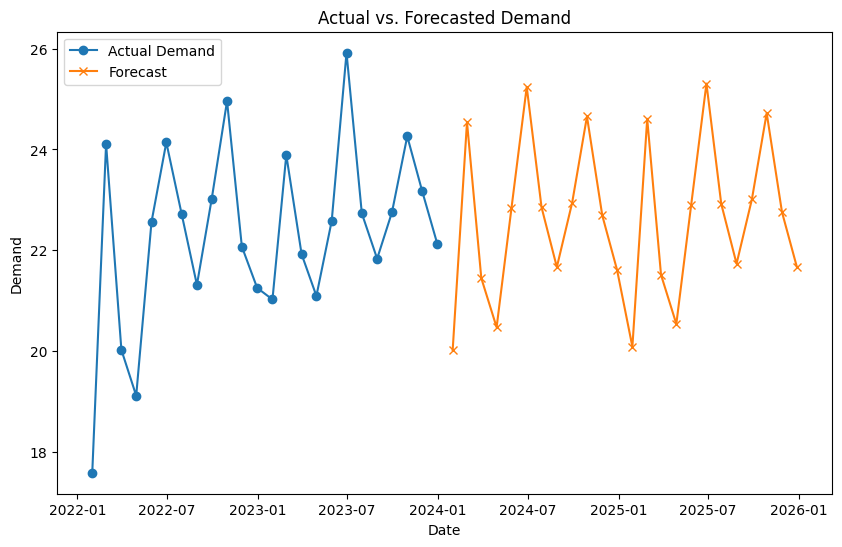

In [ ]:
# Get the forecast for the best parameters (assuming you've found the best parameters)
best_alpha, best_beta, best_gamma = best_params
forecast = holt_winters_forecast(best_alpha, best_beta, best_gamma)

# Plot actual vs. forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['demand'], label='Actual Demand', marker='o')
plt.plot(df.index[-1] + pd.DateOffset(months=1) * np.arange(1, 25), forecast, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand')
plt.legend()
plt.show()



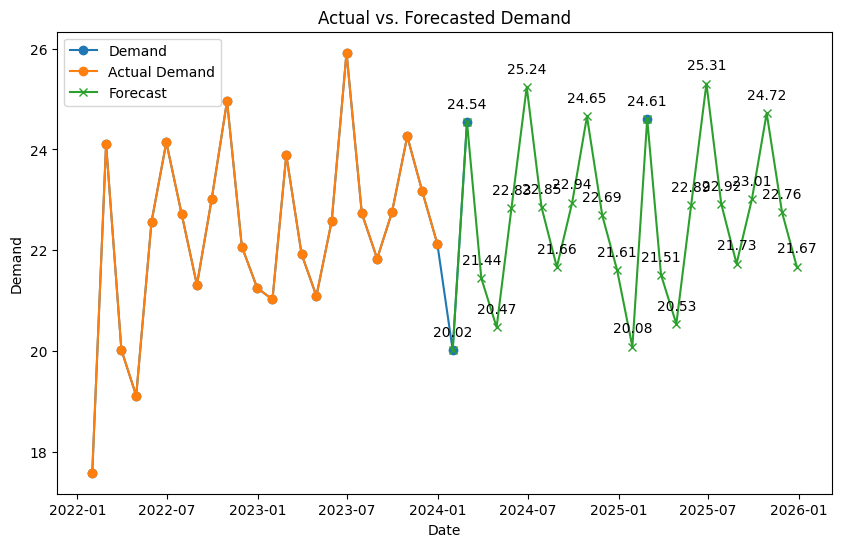

In [ ]:
# Get the forecast for the best parameters (assuming you've found the best parameters)
best_alpha, best_beta, best_gamma = best_params
forecast = holt_winters_forecast(best_alpha, best_beta, best_gamma)

# Append the forecast to the DataFrame
forecast_index = df.index[-1] + pd.DateOffset(months=1) * np.arange(1, 25)
forecast_df = pd.DataFrame({'demand': forecast}, index=forecast_index)
combined_df = pd.concat([df, forecast_df])

# Plot actual vs. forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['demand'], label='Demand', marker='o')
plt.plot(df.index, df['demand'], label='Actual Demand', marker='o')
plt.plot(forecast_index, forecast, label='Forecast', marker='x')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Forecasted Demand')
plt.legend()

# Annotate the forecasted values
for i, txt in enumerate(forecast):
    plt.annotate(f'{txt:.2f}', (forecast_index[i], forecast[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()



In [ ]:
# Get the forecast for the best parameters (assuming you've found the best parameters)
best_alpha, best_beta, best_gamma = best_params
forecast = holt_winters_forecast(best_alpha, best_beta, best_gamma)

# Visualize the forecast array
print(forecast)



2024-01-31    20.015765
2024-02-29    24.542097
2024-03-31    21.443254
2024-04-30    20.468475
2024-05-31    22.826998
2024-06-30    25.241251
2024-07-31    22.850657
2024-08-31    21.663510
2024-09-30    22.941424
2024-10-31    24.654413
2024-11-30    22.688864
2024-12-31    21.605117
2025-01-31    20.081945
2025-02-28    24.608277
2025-03-31    21.509434
2025-04-30    20.534656
2025-05-31    22.893178
2025-06-30    25.307431
2025-07-31    22.916837
2025-08-31    21.729690
2025-09-30    23.007604
2025-10-31    24.720593
2025-11-30    22.755044
2025-12-31    21.671297
Freq: M, dtype: float64


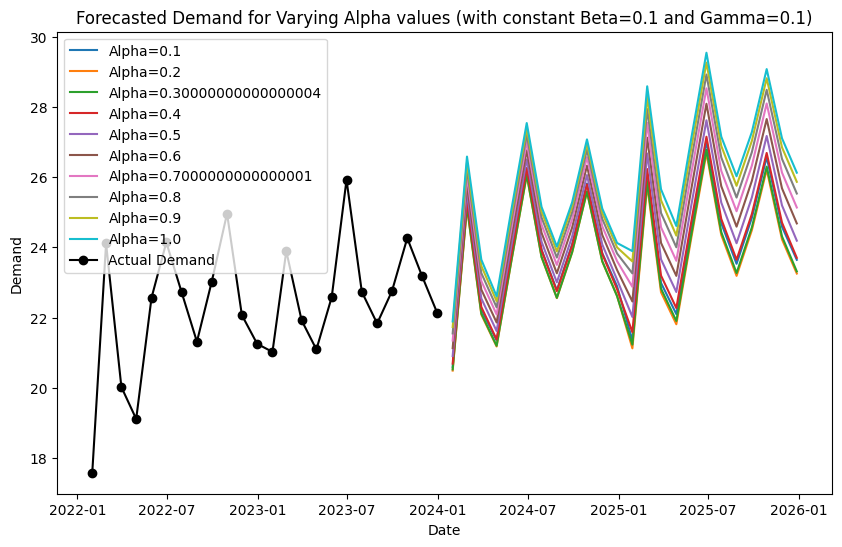

In [ ]:
beta = 0.1
gamma = 0.1

alpha_values = np.linspace(0.1, 1, num=10)  # Generate 10 alpha values from 0.1 to 1

plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    plt.plot(df.index[-1] + pd.DateOffset(months=1) * np.arange(1, 25), forecast, label=f'Alpha={alpha}')

plt.plot(df.index, df['demand'], label='Actual Demand', marker='o', color='black')  # Plot actual demand

plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Forecasted Demand for Varying Alpha values (with constant Beta=0.1 and Gamma=0.1)')
plt.legend()
plt.show()


In [ ]:
beta = 0.1
gamma = 0.1

alpha_values = np.linspace(0.1, 1, num=10)  # Generate 10 alpha values from 0.1 to 1

best_alpha = None
best_mse = float('inf')

for alpha in alpha_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'alpha={alpha}, MSE={mse}')

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print(f'\nBest alpha: {best_alpha}, Best MSE: {best_mse}')

alpha=0.1, MSE=2.922575485674876
alpha=0.2, MSE=2.1808782739918007
alpha=0.30000000000000004, MSE=2.315827917284017
alpha=0.4, MSE=3.1741868161342466
alpha=0.5, MSE=4.515449092151087
alpha=0.6, MSE=6.153410898304808
alpha=0.7000000000000001, MSE=7.938389580303055
alpha=0.8, MSE=9.739887915337242
alpha=0.9, MSE=11.44062725832436
alpha=1.0, MSE=12.932112353847268

Best alpha: 0.2, Best MSE: 2.1808782739918007


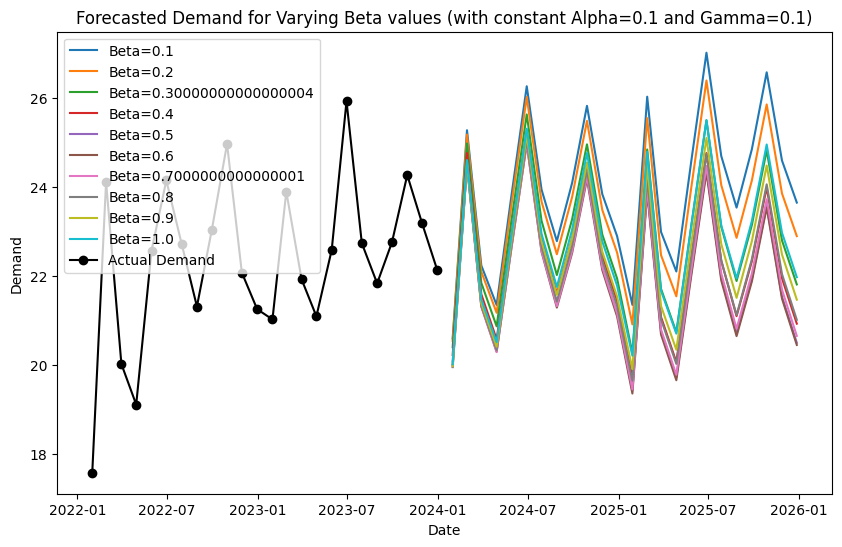

In [ ]:
alpha = 0.1
gamma = 0.1

beta_values = np.linspace(0.1, 1, num=10)  # Generate 10 beta values from 0.1 to 1

plt.figure(figsize=(10, 6))

for beta in beta_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    plt.plot(df.index[-1] + pd.DateOffset(months=1) * np.arange(1, 25), forecast, label=f'Beta={beta}')

plt.plot(df.index, df['demand'], label='Actual Demand', marker='o', color='black')  # Plot actual demand

plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Forecasted Demand for Varying Beta values (with constant Alpha=0.1 and Gamma=0.1)')
plt.legend()
plt.show()

In [ ]:
alpha = 0.1
gamma = 0.1

beta_values = np.linspace(0.1, 1, num=10)  # Generate 10 beta values from 0.1 to 1

best_beta = None
best_mse = float('inf')

for beta in beta_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'beta={beta}, MSE={mse}')

    if mse < best_mse:
        best_mse = mse
        best_beta = beta

print(f'\nBest beta: {best_beta}, Best MSE: {best_mse}')


beta=0.1, MSE=2.922575485674876
beta=0.2, MSE=1.8018561132715456
beta=0.30000000000000004, MSE=0.9461419193228547
beta=0.4, MSE=0.9503614389689833
beta=0.5, MSE=1.186545836007431
beta=0.6, MSE=1.2106403302613542
beta=0.7000000000000001, MSE=1.031461913148714
beta=0.8, MSE=0.796182237568576
beta=0.9, MSE=0.6413442331272227
beta=1.0, MSE=0.6590669404622277

Best beta: 0.9, Best MSE: 0.6413442331272227


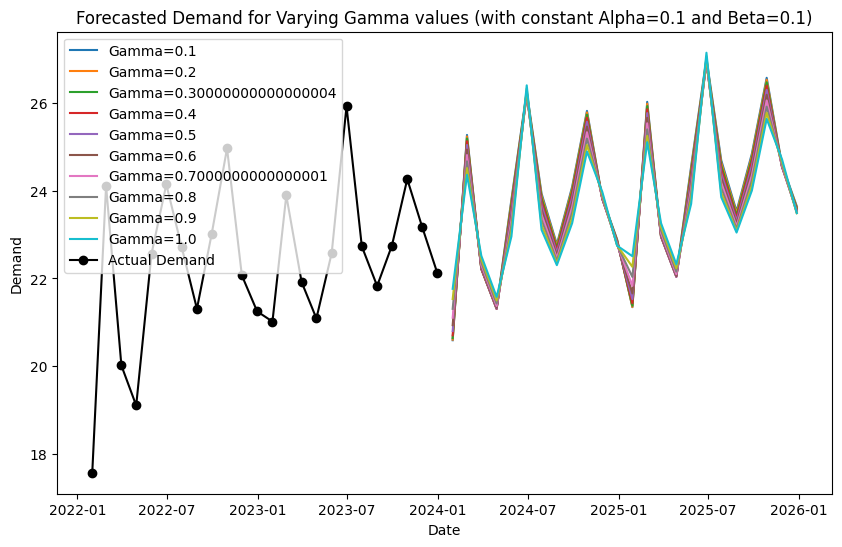

In [ ]:
alpha = 0.1
beta = 0.1

gamma_values = np.linspace(0.1, 1, num=10)  # Generate 10 gamma values from 0.1 to 1

plt.figure(figsize=(10, 6))

for gamma in gamma_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    plt.plot(df.index[-1] + pd.DateOffset(months=1) * np.arange(1, 25), forecast, label=f'Gamma={gamma}')

plt.plot(df.index, df['demand'], label='Actual Demand', marker='o', color='black')  # Plot actual demand

plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Forecasted Demand for Varying Gamma values (with constant Alpha=0.1 and Beta=0.1)')
plt.legend()
plt.show()

In [ ]:
alpha = 0.1
beta = 0.1

gamma_values = np.linspace(0.1, 1, num=10)  # Generate 10 gamma values from 0.1 to 1

best_gamma = None
best_mse = float('inf')

for gamma in gamma_values:
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mse = calculate_mse(df['demand'], forecast)

    print(f'gamma={gamma}, MSE={mse}')

    if mse < best_mse:
        best_mse = mse
        best_gamma = gamma

print(f'\nBest gamma: {best_gamma}, Best MSE: {best_mse}')

gamma=0.1, MSE=2.922575485674876
gamma=0.2, MSE=2.8311025575069144
gamma=0.30000000000000004, MSE=2.7335029878396404
gamma=0.4, MSE=2.635282615981711
gamma=0.5, MSE=2.5447625085902015
gamma=0.6, MSE=2.472877059321293
gamma=0.7000000000000001, MSE=2.4332558013580092
gamma=0.8, MSE=2.4372975708409195
gamma=0.9, MSE=2.492350026223767
gamma=1.0, MSE=2.597349191928353

Best gamma: 0.7000000000000001, Best MSE: 2.4332558013580092


calculate residuals

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
residuals = df['demand'] - forecast
print(df['demand'])
print(forecast)
print(residuals)

2022-01-31    17.58
2022-02-28    24.11
2022-03-31    20.02
2022-04-30    19.11
2022-05-31    22.56
2022-06-30    24.14
2022-07-31    22.72
2022-08-31    21.31
2022-09-30    23.02
2022-10-31    24.96
2022-11-30    22.07
2022-12-31    21.25
2023-01-31    21.02
2023-02-28    23.89
2023-03-31    21.92
2023-04-30    21.09
2023-05-31    22.58
2023-06-30    25.92
2023-07-31    22.73
2023-08-31    21.83
2023-09-30    22.75
2023-10-31    24.26
2023-11-30    23.18
2023-12-31    22.12
Freq: M, Name: demand, dtype: float64
2024-01-31    21.887913
2024-02-29    26.582145
2024-03-31    23.648652
2024-04-30    22.604461
2024-05-31    25.078828
2024-06-30    27.537970
2024-07-31    25.148737
2024-08-31    24.020587
2024-09-30    25.281224
2024-10-31    27.071847
2024-11-30    25.101827
2024-12-31    24.121855
2025-01-31    23.889768
2025-02-28    28.584000
2025-03-31    25.650508
2025-04-30    24.606316
2025-05-31    27.080683
2025-06-30    29.539825
2025-07-31    27.150592
2025-08-31    26.022442
20